## **Exploratory Data Analysis**

### **TABLE OF CONTENT**

1. Importing Data
2. Frequency of Target class
3. Distribution of features
4. Dispersion of features
5. Correlation among features
6. Clustering using PCA
7. Implementing baseline model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing Data**

*Since we have saved our data in a pickle file with custom datatype to quickly import the data and save the space in the memory*

In [2]:
df_train = pd.read_pickle("data/train.pickle")

*The data consist of 201 columns out of which 200 are continuous varibles while one column consist of target categorical variables.The
number of samples in our data is two hundred thousand.*

In [3]:
df_train.tail()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.024900,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.271700,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.531099,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.415800,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,-0.4541,...,8.9842,1.6893,0.1276,0.3766,15.210100,-2.4907,-2.2342,8.1857,12.1284,0.1385


### **Frequency of Target class**

*The target class in unbalanced with almost `ninty percent` of target class belong to class 0 and rest `ten percent` belong to class
1,Thus we have to take care of the unblanced data since our target is to classify category 1 as precisely as possible* 

0    0.89951
1    0.10049
Name: target, dtype: float64


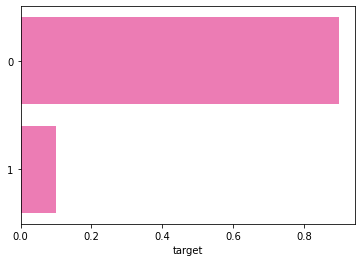

In [4]:
print(df_train['target'].value_counts()/len(df_train))
sns.barplot(x=df_train['target'].value_counts()/len(df_train), y=df_train['target'].value_counts().index,
            color="hotpink", orient="h");

### **Distribution of features**

*The distribution of features seems to closely follow Normal Disrtibution but as we can see from the distribution of the data, category 0 is highly `leptokurtic` while category 1 distribution is highly `platykurtic` in nature*

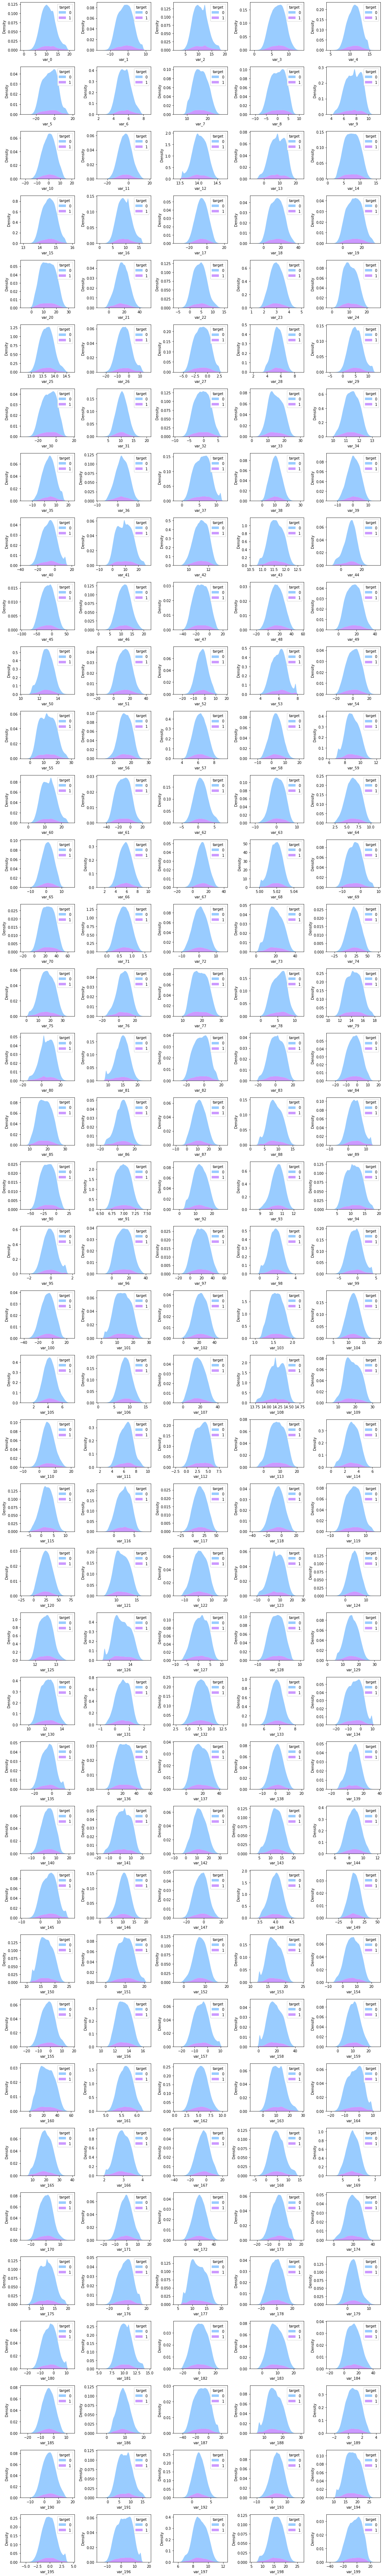

In [5]:
fig, axes = plt.subplots(40,5,figsize=(15,100))
col = df_train.columns[1:]
x = 0
for i in range(40):
    for j in range(5):
        sns.kdeplot(ax=axes[i,j],x =df_train[col[x]], y=None, hue = df_train["target"],
                    linewidth=0,fill=True, palette="cool", alpha= 0.6, multiple="stack")
        x = x + 1
plt.tight_layout();

### **Dispersion of features**

*As we can see there is wide variety of features with different scales and dispersion from the boxplots.*

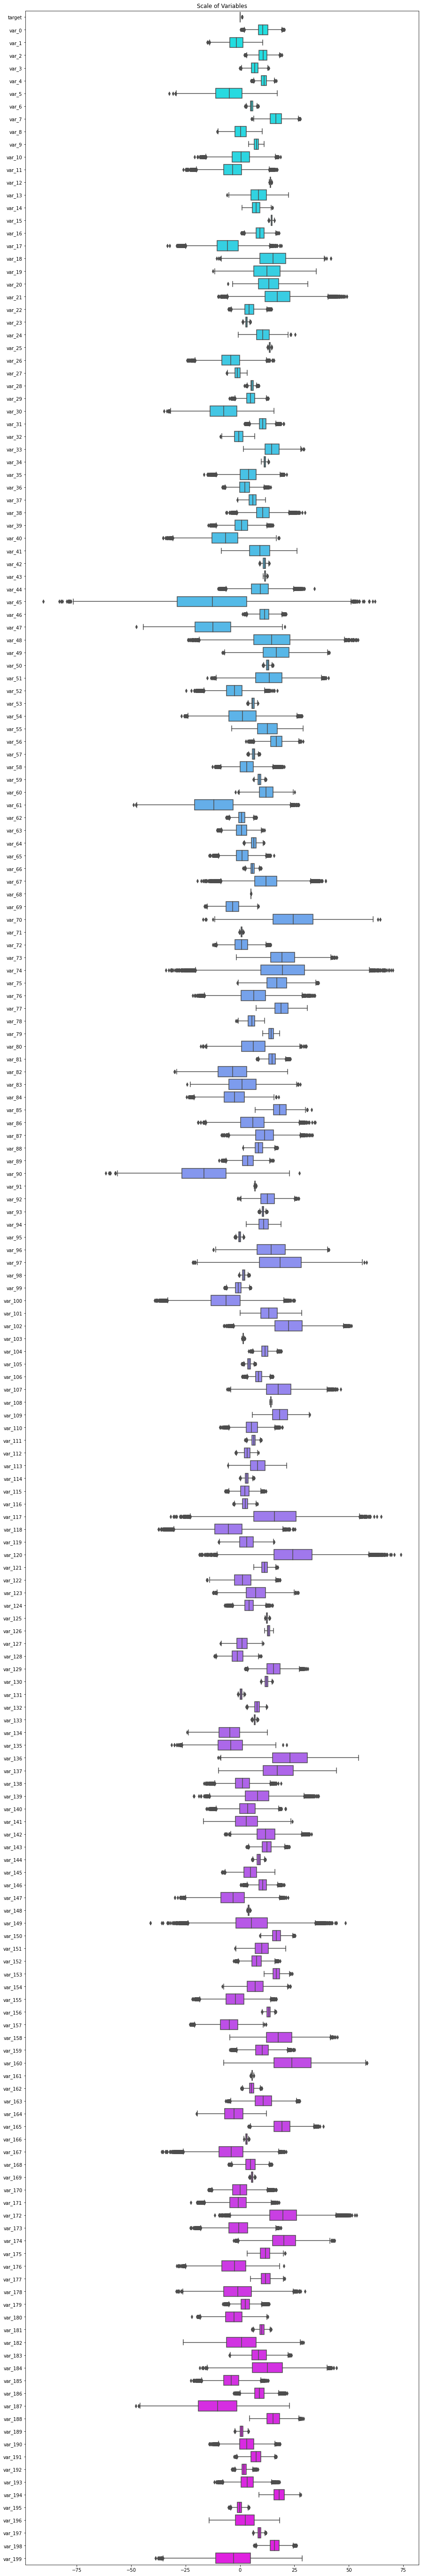

In [6]:
plt.figure(figsize=(15, 100))
ax = sns.boxplot(data=df_train, orient="h", palette="cool")
ax.set_title("Scale of Variables");

### **Correlation among features**

*As from the heatmap we can observe the all the feature have extremely low correlation with each other. Therefore from the initial 
assessmet of correlation matrix we can deduce that all variables are highly important and need to be taken in consideration 
while we implement them in  model.*

In [8]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X = df_train.iloc[:,1:]
X.columns = range(200)
y = df_train["target"]
df_scaled = scalar.fit_transform(X)

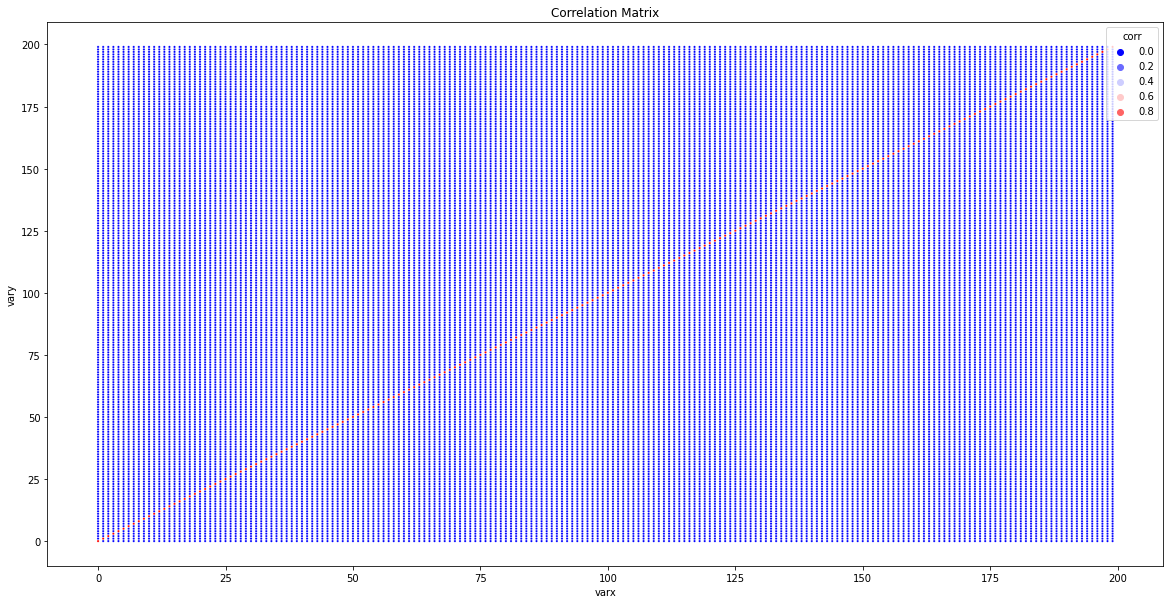

In [9]:
corr_matrix = X.corr()
corr_matrix = corr_matrix.stack().reset_index()
corr_matrix.columns = ["varx", "vary", "corr"]
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=corr_matrix, x="varx", y="vary", hue="corr", palette="bwr", s=5)
ax.set_title("Correlation Matrix");

### **Clustering using PCA**

*As we can observe from the boxplots that our data have different scales we need to scale our data before implementing  
Principal Component analysis. After Scaling data and implementing PCA we can observe that category 0 is  clustered at 
the center while category 1 is clustered,  slightly right of the x-axis*

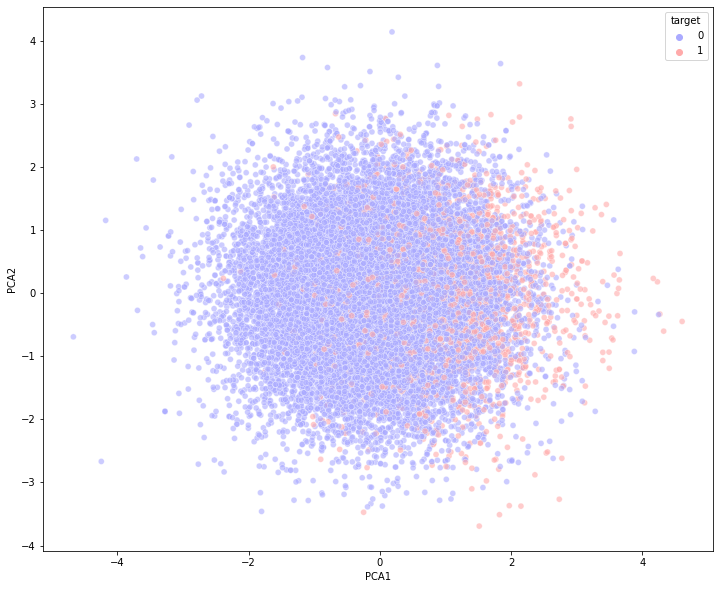

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comp = pca.fit_transform(df_scaled)
sample_index = np.random.choice(200000, size = 20000)
sample_comp = comp[sample_index]
sample_target = y[sample_index]

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x=sample_comp.T[0], y=sample_comp.T[1], hue=sample_target, palette="bwr", alpha=0.6)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2");

### **Implementing baseline model**

*We implement logistic regression as our baseline model to understand how training and testing data behaves. After 
implementing the LR regression model we conclude that our model overfits the data and poorly performs on the testing data 
set. Now taking a cue from this model we will implement  more complex models to check if they improve onthe  test set*

In [11]:
#Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

xtrain, xvalid, ytrain, yvalid = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=123)
linclf = LogisticRegression(solver="saga" ,max_iter=1000)
linclf.fit(xtrain, ytrain)
linclf.score(xvalid, yvalid)

0.91235

In [12]:
df_test = pd.read_pickle("data/test.pickle")
target = linclf.predict(df_test.to_numpy())
ID_code= pd.read_csv("data/test.csv", usecols=["ID_code"])
submission = pd.DataFrame({"ID_code":ID_code["ID_code"], "target":target})
submission.to_csv("submission.csv", index=False)

In [13]:
# initial submission shows 0.62624 score on the test set